# Sales Data Analysis

## 1. Introduction and applied methodology

The objective of this data analysis is to apply the methodology demarcated by Google, in a data set in order to provide answers to some questions made by a fictitious sales team, about the behavior of sales orders in the year 2019.

### 1.1 Data context and metadata

#### Context

Sales analytics is the practice of generating insights from sales data, trends, and metrics to set targets and forecast future sales performance. Sales analysis is mining your data to evaluate the performance of your sales team against its goals. It provides insights about the top performing and underperforming products/services, the problems in selling and market opportunities, sales forecasting, and sales activities that generate revenue.

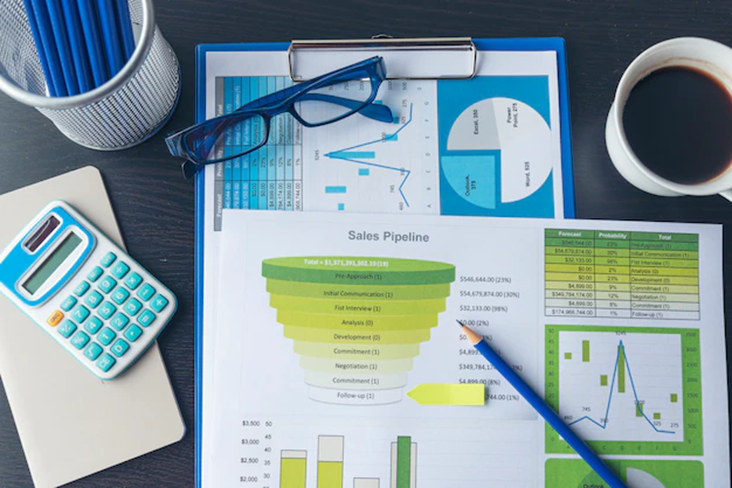

#### Metadata

This dataset is taken from __[Kaggle](https://www.kaggle.com/datasets/knightbearr/sales-product-data)__

License : CC0: Public Domain

We have 12 files with monthly data on Amazon sales orders, each dataset has this information:

**Order ID:** An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.

**Product:** The product that have been sold.

**Quantity Ordered:** Ordered Quantity is the total item quantity ordered in the initial order (without any changes).

**Price Each:** The price of each products.

**Order Date:** This is the date the customer is requesting the order be shipped.

**Purchase Address:** The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.

### 1.2 Applied methodology

Use is made of the data analysis method used by Google, which is made up of six different phases:

**Ask:** Establish the problem to be solved.

**Prepare:** Establish data needs and store them.

**Process:** Clean the data, establish whether the data is sufficient.

**Analyze:** Organize the data and use analytical methods to extract information that solves the problem.

**Share:** Generate visualizations and presentations that allow understanding the process and solution.

**Act:** Make decisions based on data analysis.

*Para el caso no se tendría una actuación sobre el problema, dado que es una actividad netamente de aprendizaje.*



# 2. Ask: Establish the problem to be solved


We need to answer these questions posed by the sales team:

**Q1:** What was the best Year for sales? How much was earned that Year?

**Q2:** What was the best month for sales? How much was earned that month.

**Q3:** What City had the highest number of sales?

**Q4:** What time should we display adverstisement to maximize likelihood of customer's buying product?

**Q5:** What products are most often sold together?

**Q6:** What product sold the most? Why do you think it sold the most?


And these probabilities must be estimated:

**P1:** How much probability for next people will ordered USB-C Charging Cable?

**P2:** How much probability for next people will ordered iPhone?

**P3:** How much probability for next people will ordered Google Phone?

**P4:** How much probability other peoples will ordered Wired Headphones?



# 3. Prepare: Establish data needs and store them

## 3.1 Data collection

The data is obtained from Kaggle, which is loaded under the dataset called: 'Sales Product data' Twelve CSV files are downloaded, in which there is monthly information on sales orders for the year 2019.

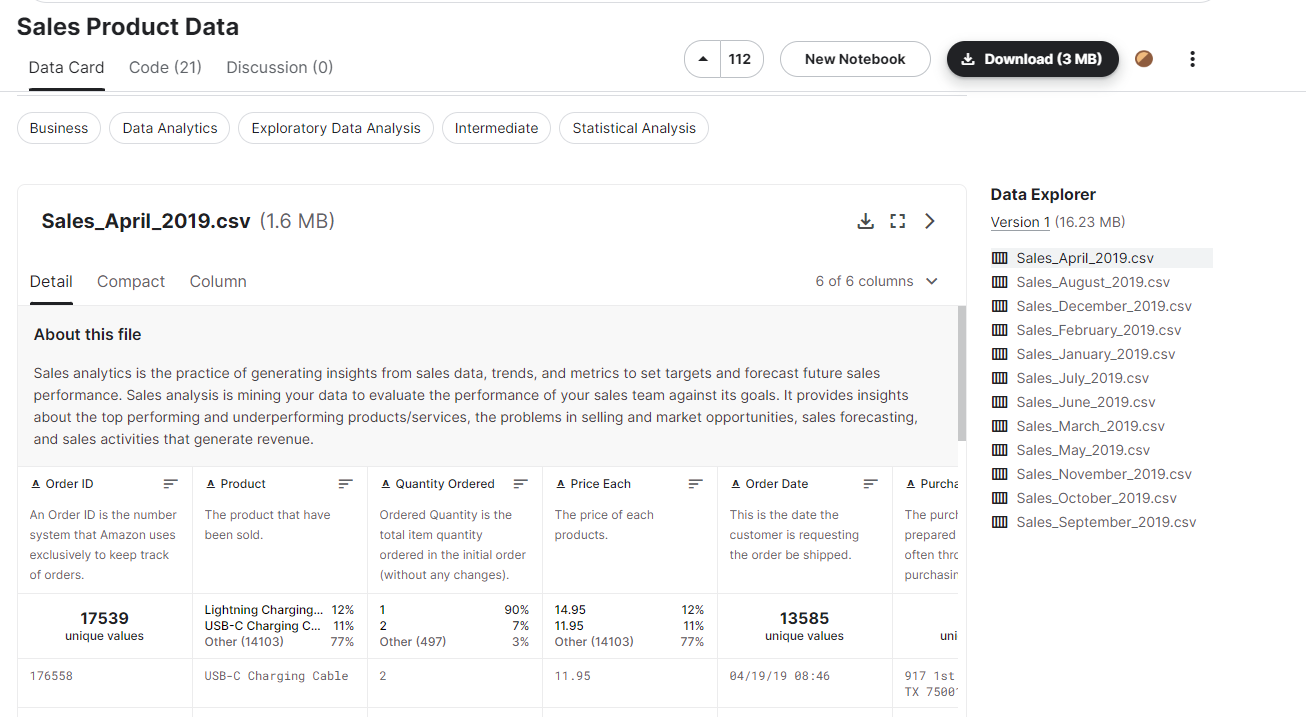

## Installation of libraries and data query

In [1]:
# Install the libraries required for the analysis
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the different data sets to verify the structure and types of data
# Reading of the data for January 2019
pd.read_csv(r'C:\Users\Felipe\Desktop\Sales Data Analysis Python\Sales/Sales_January_2019.csv').head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
# Reading of the data for February 2019
pd.read_csv(r'C:\Users\Felipe\Desktop\Sales Data Analysis Python\Sales/Sales_February_2019.csv').head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [5]:
# Save reading data in dataframes for each month
path = r'C:\Users\Felipe\Desktop\Sales Data Analysis Python\Sales/'
df_jan = pd.read_csv(path+'Sales_January_2019.csv')
df_feb = pd.read_csv(path+'Sales_February_2019.csv')
df_mar = pd.read_csv(path+'Sales_March_2019.csv')
df_apr = pd.read_csv(path+'Sales_April_2019.csv')
df_may = pd.read_csv(path+'Sales_May_2019.csv')
df_jun = pd.read_csv(path+'Sales_June_2019.csv')
df_jul = pd.read_csv(path+'Sales_July_2019.csv')
df_aug = pd.read_csv(path+'Sales_August_2019.csv')
df_sep = pd.read_csv(path+'Sales_September_2019.csv')
df_oct = pd.read_csv(path+'Sales_October_2019.csv')
df_nov = pd.read_csv(path+'Sales_November_2019.csv')
df_dec = pd.read_csv(path+'Sales_December_2019.csv')

In [6]:
# Generate arrays with the data from the columns of each data frame
df_jan_headers = df_jan.axes[1]
df_feb_headers = df_feb.axes[1]
df_mar_headers = df_mar.axes[1]
df_apr_headers = df_apr.axes[1]
df_may_headers = df_may.axes[1]
df_jun_headers = df_jun.axes[1]
df_jul_headers = df_jul.axes[1]
df_aug_headers = df_aug.axes[1]
df_sep_headers = df_sep.axes[1]
df_oct_headers = df_oct.axes[1]
df_nov_headers = df_nov.axes[1]
df_dec_headers = df_dec.axes[1]

# Compare the headers of the dataframes
df_feb_headers == df_jan_headers
df_mar_headers == df_jan_headers
df_apr_headers == df_jan_headers
df_may_headers == df_jan_headers
df_jun_headers == df_jan_headers
df_jul_headers == df_jan_headers
df_aug_headers == df_jan_headers
df_sep_headers == df_jan_headers
df_oct_headers == df_jan_headers
df_nov_headers == df_jan_headers
df_dec_headers == df_jan_headers

array([ True,  True,  True,  True,  True,  True])

In [7]:
df_jan.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [8]:
# Join the dataframes into one and check the union
df = pd.concat([df_jan, df_feb, df_mar, df_apr, df_may, 
                df_jun, df_jul, df_aug, df_sep, df_oct, 
                df_nov, df_dec])

# Remove rows that were with column name values
df.drop(df.loc[df['Order ID'] == 'Order ID'].index, inplace=True)
df.index = range(df.shape[0])
df.to_csv('df.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
183266,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
183267,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
183268,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
183269,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


From the first interaction with the data, we can notice:
- We have numerical data like Quantity Ordered and Price Each.
- Categorical data such as Order ID, Product, Order Date and Purchase Address.
- In Purchase Address we will have to perform data transformation to separate the city and state data.

In [9]:
# Set the size of the data
df.shape

(183271, 6)

# 4. Process: Clean the data, establish whether the data is sufficient

## 4.1 Data understanding

In [10]:
# Get initial information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183271 entries, 0 to 183270
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          182735 non-null  object
 1   Product           182735 non-null  object
 2   Quantity Ordered  182735 non-null  object
 3   Price Each        182735 non-null  object
 4   Order Date        182735 non-null  object
 5   Purchase Address  182735 non-null  object
dtypes: object(6)
memory usage: 8.4+ MB


We notice that there is null data in the columns

In [11]:
df.nunique()

Order ID            175449
Product                 19
Quantity Ordered         9
Price Each              23
Order Date          140463
Purchase Address    138946
dtype: int64

We see how sales only obey 19 different products, without a great variation in the quantities purchased, and with few price variations, at least as far as unique data is concerned.

## 4.2 Data cleansing

In [12]:
# Search for missing data
for col in df.columns:
    porc_nulos = np.mean(df[col].isnull()*100)
    print('{} - {}%'.format(col, porc_nulos))

Order ID - 0.2924630738087313%
Product - 0.2924630738087313%
Quantity Ordered - 0.2924630738087313%
Price Each - 0.2924630738087313%
Order Date - 0.2924630738087313%
Purchase Address - 0.2924630738087313%


The percentage of nulls for each column is the same (0.29%), being a fairly low value. To validate what information is needed, we display it.

In [16]:
# Remove all rows that contain a NA in any of the attributes
df2 = df.dropna()

In [17]:
# Validation of the amounts and percentage of deleted rows
x = len(df.index)
y = len(df2.index)
print(x - y)
print((x-y)*100/x)

536
0.2924630738087313


In [18]:
# Continue with the same df after validation of the rows to delete
df = df.dropna()

In [19]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

We see how some attributes have a wrong data type case:
- Quantity Ordered which is Object and should be int64
- Price Each which is Object and should be float64
- Order Date which is Object and should be date

Therefore, data type changes must be made.

In [20]:
df.loc[:,'Quantity Ordered'] = df.loc[:,'Quantity Ordered'].astype('int64')
df.loc[:,'Price Each'] = df.loc[:,'Price Each'].astype('float64')
df.loc[:,'Order Date'] = pd.to_datetime(df.loc[:,'Order Date'])

In [21]:
# Validations of the update of the data types
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [22]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
183266,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
183267,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
183268,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
183269,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [23]:
# Validation of duplicate rows
duplicados = []
for col in range(df.shape[1]):
    contents = df.iloc[:, col]
    
    for comp in range(col + 1, df.shape[1]):
        if contents.equals(df.iloc[:, comp]):
            duplicados.append(comp)
duplicados = np.unique(duplicados).tolist()

There are no duplicate rows in all your values.

In [24]:
# Separation of data from 'Purchase Address' in Address, City, PostalCode
Address_split = df['Purchase Address'].str.split(', ', expand = True)
Address_split.columns = ['Address', 'City', 'PostalCode']
df = pd.concat([df, Address_split], axis = 1)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Address,City,PostalCode
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",387 10th St,Austin,TX 73301
...,...,...,...,...,...,...,...,...,...
183266,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14 Madison St,San Francisco,CA 94016
183267,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",549 Willow St,Los Angeles,CA 90001
183268,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",273 Wilson St,Seattle,WA 98101
183269,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",778 River St,Dallas,TX 75001


In [25]:
df['City'].unique()

array(['Boston', 'Portland', 'San Francisco', 'Los Angeles', 'Austin',
       'Atlanta', 'Seattle', 'New York City', 'Dallas'], dtype=object)

In [26]:
df['Address'].unique()

array(['944 Walnut St', '185 Maple St', '538 Adams St', ...,
       '10 Highland St', '616 Highland St', '273 Wilson St'], dtype=object)

In [27]:
df['PostalCode'].unique()

array(['MA 02215', 'OR 97035', 'CA 94016', 'CA 90001', 'TX 73301',
       'GA 30301', 'WA 98101', 'NY 10001', 'TX 75001', 'ME 04101'],
      dtype=object)

In [28]:
# Remove the 'Purchase Address' column from the df
df.drop(['Purchase Address'], axis=1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Address,City,PostalCode
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,387 10th St,Austin,TX 73301
...,...,...,...,...,...,...,...,...
183266,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,14 Madison St,San Francisco,CA 94016
183267,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,549 Willow St,Los Angeles,CA 90001
183268,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,273 Wilson St,Seattle,WA 98101
183269,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,778 River St,Dallas,TX 75001


## 4.3 Initial data visualizations

In [29]:
# Description using statistics of numerical data
df.describe()

,Quantity Ordered,Price Each
count,182735.000000,182735.000000
mean,1.124333,184.315392
std,0.442937,332.684344
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


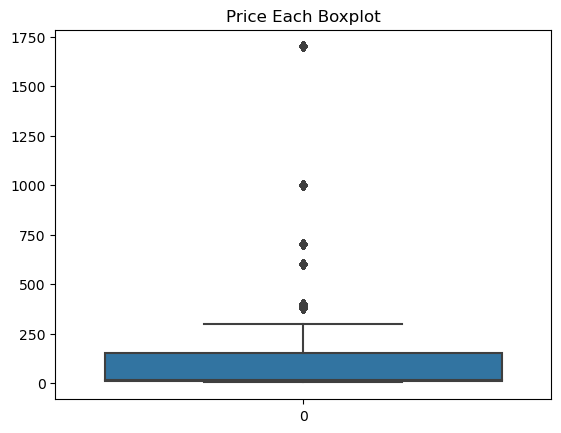

In [30]:
# Boxplot display of Price Each
sns.boxplot(data = df['Price Each'])
plt.title('Price Each Boxplot')
plt.show()

The graph allows us to observe that we have points that seem to be extreme values, we would have to validate if these are errors or not.

In a bivariate review between Price Each and Quantity Ordered we can see the relationship between these two variables.

Text(0.5, 1.0, 'Distribución marginal de Quantity Ordered')

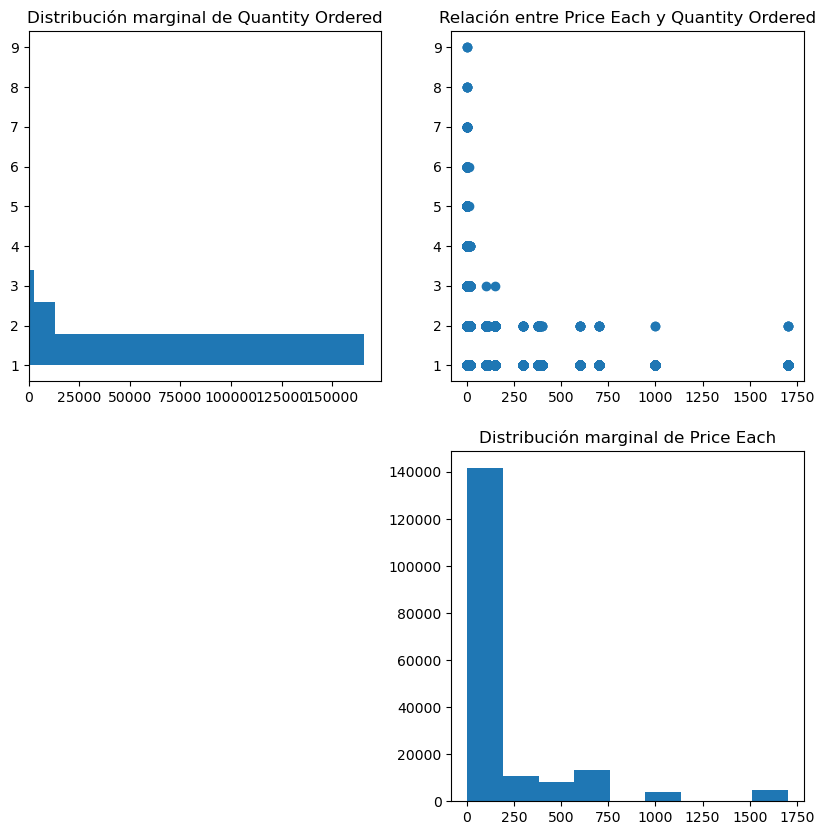

In [31]:
# Creating a cross chart
plt.figure(figsize = (10,10))
plt.subplot(2,2,2)
plt.scatter(x=df['Price Each'], y=df['Quantity Ordered'])
plt.title('Relación entre Price Each y Quantity Ordered')

plt.subplot(2,2,4)
plt.hist(x=df['Price Each'], bins = 9)
plt.title('Distribución marginal de Price Each')

plt.subplot(2,2,1)
plt.hist(x=df['Quantity Ordered'], bins = 10, orientation = 'horizontal')
plt.title('Distribución marginal de Quantity Ordered' )

We can see in the cross graph the relationship of Unit Prices vs Ordered Quantities, so that we can establish that most of the orders are made for unitary products, as well as that the unit prices mostly range between 11.95 and 150 dollars. With some extreme points in terms of the quantity and unit value of the products.

## 4.4 Extreme Value Review

In [32]:
df2 = df[df['Price Each'] > 750]
df2['Product'].unique()

array(['Macbook Pro Laptop', 'ThinkPad Laptop'], dtype=object)

Products over $750 are reviewed, resulting in a listing of two unique products 'Macbook Pro Laptop' and 'ThinkPad Laptop'. Therefore, it is solved that the extreme points are not errors.

# 5. Analyze: Organize the data and use analytical methods to extract information that solves the problem

Since a list of questions to be resolved is established, a review of the data will then be carried out through graphs and tables to arrive at the answer for each of the questions.

We need to answer these questions posed by the sales team:

**Q1:** What was the best Year for sales? How much was earned that Year?

**Q2:** What was the best month for sales? How much was earned that month?

**Q3:** What City had the highest number of sales?

**Q4:** What time should we display adverstisement to maximize likelihood of customer's buying product?

**Q5:** What products are most often sold together?

**Q6:** What product sold the most? Why do you think it sold the most?


And these probabilities must be estimated:

**P1:** How much probability for next people will ordered USB-C Charging Cable?

**P2:** How much probability for next people will ordered iPhone?

**P3:** How much probability for next people will ordered Google Phone?

**P4:** How much probability other peoples will ordered Wired Headphones?

### Q1: What was the best Year for sales? How much was earned that Year?

To solve these questions about groupings by year and month we will need to perform transformations on the data, extracting and generating columns for each of these. As well as calculating the total price of the order Total_Price = Price Each * Quantity Ordered

In [33]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Total_Price'] = df['Price Each']*df['Quantity Ordered']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Address,City,PostalCode,Year,Month,Total_Price
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,MA 02215,2019,1,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,OR 97035,2019,1,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,CA 94016,2019,1,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,CA 90001,2019,1,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",387 10th St,Austin,TX 73301,2019,1,11.99
...,...,...,...,...,...,...,...,...,...,...,...,...
183266,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14 Madison St,San Francisco,CA 94016,2019,12,14.95
183267,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",549 Willow St,Los Angeles,CA 90001,2019,12,7.68
183268,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",273 Wilson St,Seattle,WA 98101,2019,12,400.00
183269,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",778 River St,Dallas,TX 75001,2019,12,11.99


Generation of a bar chart with total sales per year.

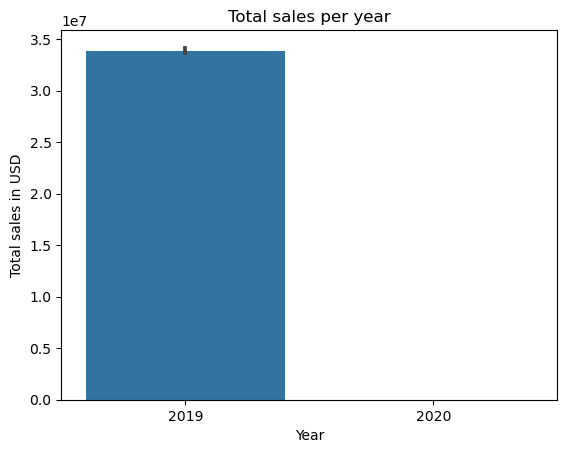

In [35]:
sns.barplot(x = 'Year', y = 'Total_Price', data = df, estimator=sum)
plt.ylabel('Total sales in USD')
plt.title('Total sales per year')
plt.show()

In [37]:
# Table with total sales per year.
df_sales = df.groupby(by=['Year']).sum()
df_sales['Total_Price']

Year
2019    33871109.48
2020        8670.29
Name: Total_Price, dtype: float64

#### Q1 Answers:

**- What was the best Year for sales? The best year for sales was 2019.**

**- How much was earned that Year? Sales revenue that year was $33,871,110 dollars.**

### Q2: What was the best month for sales? How much was earned that month?

Generation of a bar graph with total monthly sales per year.

In [44]:
# Table with total monthly sales per year.
pd.set_option('display.max_rows', 13)
df_m_sales = df.groupby(by=['Year','Month']).sum().reset_index()
df_m_sales

,Year,Month,Quantity Ordered,Price Each,Total_Price
0,2019,1,10629,1767652.39,1777841.00
1,2019,2,13162,2145208.87,2158127.48
2,2019,3,16697,2740393.12,2755969.40
3,2019,4,20226,3313522.35,3336376.42
4,2019,5,18344,3084756.09,3101881.04
5,2019,6,14964,2508863.49,2524464.99
6,2019,7,15781,2572764.75,2587444.91
7,2019,8,13185,2178183.81,2191698.31
8,2019,9,12827,2038019.59,2050361.26
9,2019,10,22356,3658884.86,3679254.16


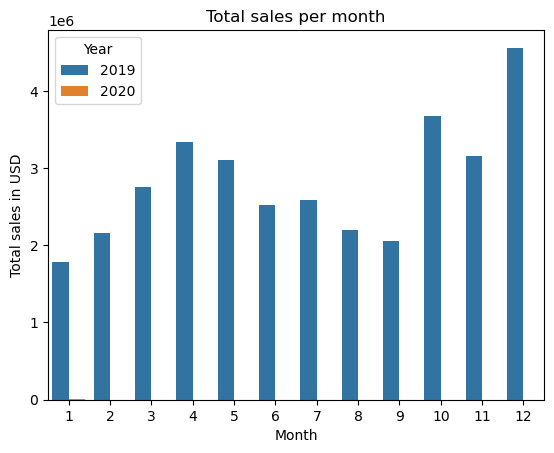

In [43]:
sns.barplot(x = 'Month', y = 'Total_Price', hue = 'Year', data = df_m_sales, estimator=sum)
plt.title('Total sales per month')
plt.ylabel('Total sales in USD')
plt.show()

#### Q2 Answers:

**- What was the best month for sales? The best month for sales was December 2019.**

**- How much was earned that month? Total sales were for $4,557,905.**

### Q3: What City had the highest number of sales?

Generation of a bar graph with the quantities of units sold by city.

In [46]:
# Table with total sales by city.
pd.set_option('display.max_rows', 10)
df_city = df.groupby(by=['City']).sum().reset_index()
df_city[['City','Quantity Ordered']].sort_values('Quantity Ordered', ascending = False).rename(columns={'Quantity Ordered':'Total quantity ordered'})

,City,Total quantity ordered
7,San Francisco,49363
4,Los Angeles,32722
5,New York City,27470
2,Boston,22123
3,Dallas,16453
0,Atlanta,16304
8,Seattle,16281
6,Portland,13806
1,Austin,10933


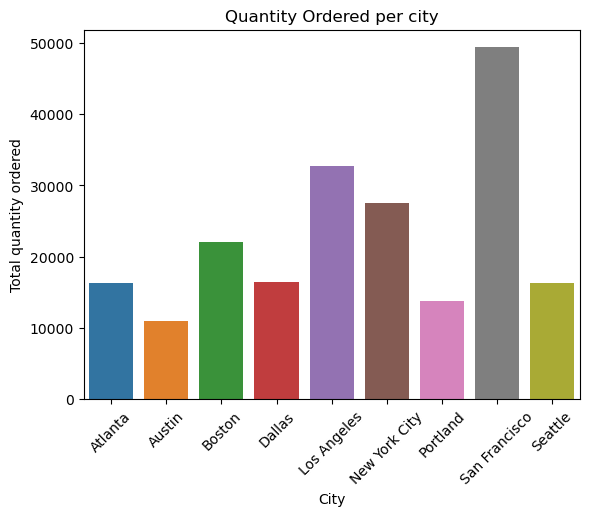

In [47]:
sns.barplot(x = 'City', y = 'Quantity Ordered', data = df_city)
plt.xticks(rotation=45)
plt.title('Quantity Ordered per city')
plt.ylabel('Total quantity ordered')
plt.show()

Graphic of the geographic heatmap of the total quantities sold.

In [69]:
!pip install folium
!pip install geopy
!pip install geocoder

import geopy
import geocoder
import folium
from folium import plugins
from folium.plugins import HeatMap
import ipywidgets

     -------------------------------------- 119.8/119.8 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 40.3/40.3 kB 477.5 kB/s eta 0:00:00


In [70]:
import IPython
from IPython.core.display import display, HTML

def folium_deepnote_show(m):
    data = m.get_root().render()
    data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 609px;', 1)
    display(HTML(data_fixed_height))

In [71]:
# Guide taken from Product Sales Data Analysis by KAMANI GETTAPOLA in Kaggle

# Generate map with location in USA
mp = folium.Map(location=[41,-99], zoom_start=4.4)
# Generate an array to store the location data
loc =[]
# Generate a list of cities to graph
ciudades = df_city.City.tolist()
# For to store the city and quantity sold in the variables to be graphed
for i in ciudades:
    geo = geocoder.arcgis(i)
    val = df_city.loc[df_city['City'] ==i]['Quantity Ordered'].item()
    loc.append([geo.lat, geo.lng,val])
    folium.Marker([geo.lat,geo.lng],
                  opacity=0,
                  tooltip = ('<body>Ciudad: {} <br> Cantidad: {}</body>'.format(i, val))).add_to(mp)
# Generation of the heat map with the data by location and add it to the map   
HeatMap(loc).add_to(mp)
folium.LayerControl().add_to(mp)

folium_deepnote_show(mp)

In [72]:
mp

#### Q3 Answers:
**- What City had the highest number of sales? San Francisco had the most units sold with 49,363 units.**

### Q4: What time should we display adverstisement to maximize likelihood of customer's buying product?

In [73]:
# Extract the time in a column
df['Hour'] = df['Order Date'].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Address,City,PostalCode,Year,Month,Total_Price,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,MA 02215,2019,1,700.00,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,OR 97035,2019,1,14.95,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,CA 94016,2019,1,23.98,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,CA 90001,2019,1,149.99,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",387 10th St,Austin,TX 73301,2019,1,11.99,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183266,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14 Madison St,San Francisco,CA 94016,2019,12,14.95,20
183267,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",549 Willow St,Los Angeles,CA 90001,2019,12,7.68,12
183268,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",273 Wilson St,Seattle,WA 98101,2019,12,400.00,6
183269,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",778 River St,Dallas,TX 75001,2019,12,11.99,10


In [75]:
# Table with total sales per hour
pd.set_option('display.max_rows', 24)
df_hour = df.groupby(by=['Hour']).sum().reset_index()
df_hour[['Hour','Total_Price']].sort_values('Total_Price', ascending = False).rename(columns={'Total_Price':'Total sales in USD'})

,Hour,Total sales in USD
19,19,2370005.59
12,12,2269676.91
11,11,2267169.73
20,20,2242856.37
18,18,2176209.65
13,13,2118394.83
17,17,2086082.23
14,14,2045085.42
21,21,2013288.02
10,10,1907179.29


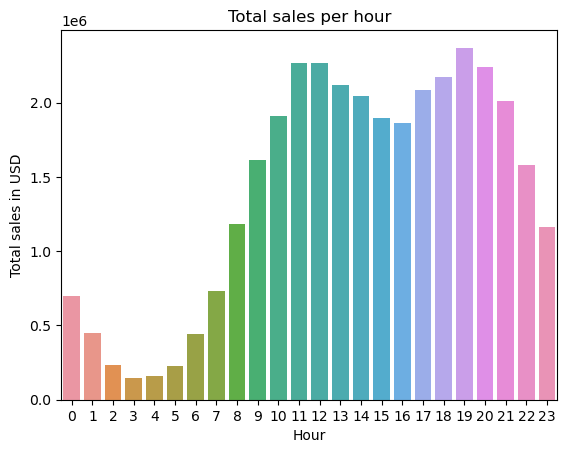

In [76]:
sns.barplot(x = 'Hour', y = 'Total_Price', data = df_hour)
plt.title('Total sales per hour')
plt.ylabel('Total sales in USD')
plt.show()

#### Q4 Answers:
**- What time should we display adverstisement to maximize likelihood of customer's buying product? With the information that is available, based on the total income per hour, the hours in which the ads should be placed are between 10 - 11 and 19 - 20 hours. Due to the fact that in these hours are those in which historically the greatest amount of income is presented.**

### What products are most often sold together?

In [77]:
# Solution taken from 'Analysis: Sales Data by Knightbearr' in Kaggle.
from itertools import combinations
from collections import Counter

# Drop it using duplicated() funct
data = df[df['Order ID'].duplicated(keep=False)]
# Create a new column
data['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# Let's make a new variable
data = data[['Order ID', 'Grouped']].drop_duplicates()
# Create a new variable for Counter
count = Counter()
# Make a for loop
comb=[]
quan = []
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# And make another for loop    
for key, value in count.most_common(10):
    comb.append(key)
    quan.append(value)
    print(key, value)

('iPhone', 'Lightning Charging Cable') 973
('Google Phone', 'USB-C Charging Cable') 954
('iPhone', 'Wired Headphones') 437
('Google Phone', 'Wired Headphones') 401
('Vareebadd Phone', 'USB-C Charging Cable') 348
('iPhone', 'Apple Airpods Headphones') 343
('Google Phone', 'Bose SoundSport Headphones') 219
('USB-C Charging Cable', 'Wired Headphones') 156
('Vareebadd Phone', 'Wired Headphones') 141
('Lightning Charging Cable', 'Wired Headphones') 92


#### Q5 Answers:

**- What products are most often sold together? The products that sell the most together are the 'iPhone' and the 'Lightning Charging Cable' since there were 973 times in which both were sold in the same order.**

### Q6: What product sold the most? Why do you think it sold the most?

In [78]:
# Table with the quantities sold by product
pd.set_option('display.max_rows', 19)
df_prod = df.groupby(by=['Product']).sum().reset_index()
df_mean = df.groupby(by=['Product']).mean().reset_index()
df_prod[['Product','Quantity Ordered']].sort_values('Quantity Ordered', ascending = False)

,Product,Quantity Ordered
5,AAA Batteries (4-pack),30487
4,AA Batteries (4-pack),27148
15,USB-C Charging Cable,23555
12,Lightning Charging Cable,22841
17,Wired Headphones,20201
6,Apple Airpods Headphones,15383
7,Bose SoundSport Headphones,13236
2,27in FHD Monitor,7429
18,iPhone,6732
1,27in 4K Gaming Monitor,6134


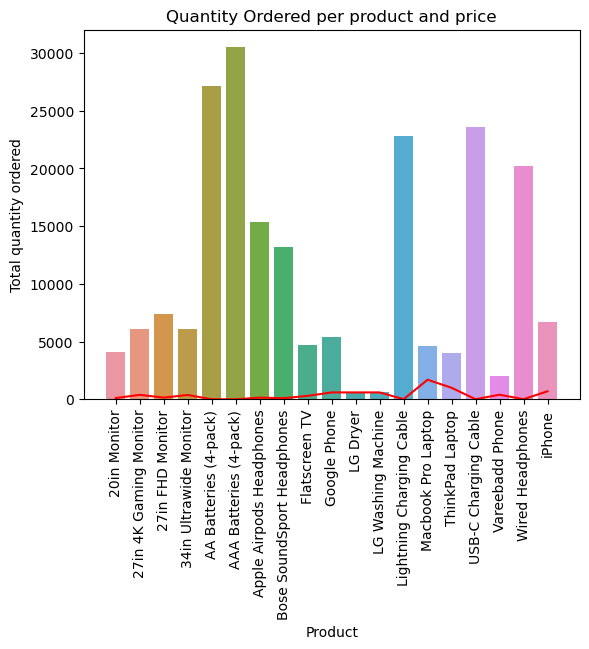

In [79]:
# Graph with the quantities sold by product and the unit price
bars = sns.barplot(x = 'Product', y = 'Quantity Ordered', data = df_prod, estimator=sum)
line = sns.lineplot(x = 'Product', y = 'Price Each', data = df_mean, color="red")
plt.xticks(rotation=90)
plt.title('Quantity Ordered per product and price')
plt.ylabel('Total quantity ordered')
plt.show()

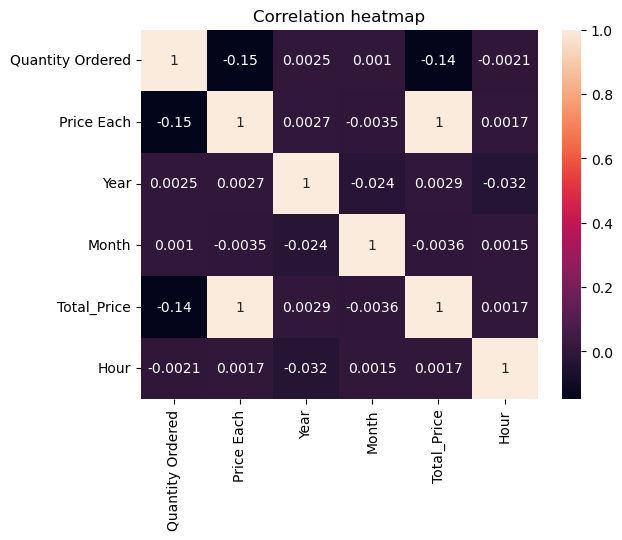

In [80]:
# Heatmap to see correlation between variables
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.title('Correlation heatmap')
plt.show()

#### Q6 Answers:

**- What product sold the most? The product that has been sold the most in terms of quantity is the AAA Batteries (4-pack) with 30487 units.**

**- Why do you think it sold the most? It may be due to the low price, since the best selling products seem to have the lowest price. However, this is not fully supported by the correlation of variables, since although an inverse relationship is seen between the unit price and the quantity ordered, this correlation is low and does not mean causation.**

### P1: How much probability for next people will ordered USB-C Charging Cable?

In [81]:
# Solution taken from 'In-depth Analysis on Sales Dataset by SONALI SHETH' in Kaggle.
# Creation of a function to calculate the probability
def statistical_probability(frequency, total_frequency):
    return 100*frequency / total_frequency
product = df.Product.value_counts().sum() 

In [82]:
# Generating a df to store only the required product data
usb_charging = df[df.Product == 'USB-C Charging Cable'].value_counts().sum()
# Calculation of the probability by means of the function
P_USB = statistical_probability(usb_charging, product)
Pprime_USB = 100 - P_USB
print('The probability that the next sale will be a USB-C Charging Cable is from: %.4f%%' % P_USB)
print('The probability that the next sale will not be a USB-C Charging Cable is from: %.4f%%' % Pprime_USB)

The probability that the next sale will be a USB-C Charging Cable is from: 11.7783%
The probability that the next sale will not be a USB-C Charging Cable is from: 88.2217%


#### P1 Answers:

**- How much probability for next people will ordered USB-C Charging Cable? The probability that the next product to be sold is the USB-C Charging Cable is from 11.77%.**

### P2: How much probability for next people will ordered iPhone?

In [83]:
# Generating a df to store only the required product data
iphone = df[df.Product == 'iPhone'].value_counts().sum()
# Calculation of the probability by means of the function
P_iphone = statistical_probability(iphone, product)
Pprime_iphone = 100 - P_iphone
print('The probability that the next sale will be an iPhone is: %.4f%%' % P_iphone)
print('The probability that the next sale will not be an iPhone is: %.4f%%' % Pprime_iphone)

The probability that the next sale will be an iPhone is: 3.6802%
The probability that the next sale will not be an iPhone is: 96.3198%


#### P2 Answers:

**- How much probability for next people will ordered iPhone? The probability that the next product to be released is an iPhone is 3.68%.**

### P3: How much probability for next people will ordered Google Phone?

In [84]:
# Generating a df to store only the required product data
gphone = df[df.Product == 'Google Phone'].value_counts().sum()
# Calculation of the probability by means of the function
P_gphone = statistical_probability(gphone, product)
Pprime_gphone = 100 - P_gphone
print('The probability that the next sale will be a Google Phone is from: %.4f%%' % P_gphone)
print('The probability that the next sale will not be a Google Phone is from: %.4f%%' % Pprime_gphone)

The probability that the next sale will be a Google Phone is from: 2.9732%
The probability that the next sale will not be a Google Phone is from: 97.0268%


#### P3 Answers:

**- How much probability for next people will ordered Google Phone? The probability that the next product to be released is a Google Phone is 2.97%.**

### P4: How much probability other peoples will ordered Wired Headphones?

In [85]:
# Generating a df to store only the required product data
W_head = df[df.Product == 'Wired Headphones'].value_counts().sum()
# Calculation of the probability by means of the function
P_W_head = statistical_probability(W_head, product)
Pprime_W_head = 100 - P_W_head
print('The probability that the next sale will be a Google Phone is: %.4f%%' % P_W_head)
print('The probability that the next sale will not be a Google Phone is: %.4f%%' % Pprime_W_head)

The probability that the next sale will be a Google Phone is: 10.1524%
The probability that the next sale will not be a Google Phone is: 89.8476%


#### P4 Answers:

**- How much probability for next people will ordered Wired Headphones? The probability that the next product to be released will be a Wired Headphones is 10.15%.**

# Generate visualizations and presentations that allow understanding the process and solution

## Answers to the objectives of data analysis

Below, as a summary, the answers to the formulated answers are established and that make up the objectives of the data analysis.

**Q1 Answers:**

**What was the best Year for sales?** The best year for sales was 2019.

**How much was earned that Year?** Sales revenue that year was $33,871,110.

**Q2 Answers:**

**What was the best month for sales?** The best month for sales was December 2019.

**How much was earned that month?** Total sales were for $4,557,905.

**Q3 Answers:**

**What City had the highest number of sales?** San Francisco had the most units sold with 49,363 units.

**Q4 Answers:**

**What time should we display adverstisement to maximize likelihood of customer's buying product?** With the information that is available, based on the total income per hour, the hours in which the ads should be placed are between 10 - 11 and 19 - 20 hours. Due to the fact that in these hours are those in which historically the greatest amount of income is presented.

**Q5 Answers:**

**What products are most often sold together?** The products that sell the most together are the 'iPhone' and the 'Lightning Charging Cable' since there were 973 times in which both were sold in the same order.

**Q6 Answers:**

**What product sold the most?** The product that has been sold the most in terms of quantity is the AAA Batteries (4-pack) with 30487 units.

**Why do you think it sold the most?** It may be due to the low price, since the best selling products seem to have the lowest price. However, this is not fully supported by the correlation of variables, since although an inverse relationship is seen between the unit price and the quantity ordered, this correlation is low and does not mean causation.

**P1 Answers:** 

**How much probability for next people will ordered USB-C Charging Cable?** The probability that the next product to be sold is the USB-C Charging Cable is from 11.77%.

**P2 Answers:**

**How much probability for next people will ordered iPhone?** The probability that the next product to be released is an iPhone is 3.68%.

**P3 Answers:**

**How much probability for next people will ordered Google Phone?** The probability that the next product to be released is a Google Phone is 2.97%.

**P4 Answers:**

**How much probability for next people will ordered Wired Headphones?** The probability that the next product to be released will be a Wired Headphones is 10.15%.